# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [44]:
import pandas as pd

# Load the data
internetAd = pd.read_csv(
    "Internet_Ad_Data.csv",
    sep=",",
    on_bad_lines="skip",
    low_memory=False,
    true_values=["1"],
    false_values=["0"],
    skipinitialspace=True,
)
display(internetAd.info())
display(internetAd.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


None

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [45]:
import numpy as np

# Replace ?

# regex pattern matching any string ending with a question mark. The question mark apparently is prepended with some spaces.
pattern = r"^\s*\?$" # Regular Expression matching 0 or more white spaces at the beginning of the value, followed bythe question mark and the end of the value.

internetAd = internetAd.replace(pattern, np.nan, regex=True)
internetAd["Target"] = internetAd["Target"].map({"ad.": 1, "nonad.": 0})


Question 1.1 Part 2: Check that replacing worked

In [46]:
# Let's just limit to two columnns, row 10 has some missing values.
internetAd[['height', 'Target']].head(20)

,height,Target
0,125,1
1,57,1
2,33,1
3,60,1
4,60,1
5,60,1
6,59,1
7,60,1
8,60,1
9,60,1


Make Sure that "height","width","aratio" is type - float

In [47]:
internetAd[['height', 'width', 'aratio', 'local']] = internetAd[['height', 'width', 'aratio', 'local']].astype(float)
internetAd[['height', 'width', 'aratio', 'local']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  2376 non-null   float64
 1   width   2378 non-null   float64
 2   aratio  2369 non-null   float64
 3   local   3264 non-null   float64
dtypes: float64(4)
memory usage: 102.6 KB


Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [48]:
internetAd[['height', 'width', 'aratio', 'local']].describe()


,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


The average height is 64 pixels and average width is 155 pixels. The average aspect ration is around 3.9, which doesn't really match the aspect ration of a typical image. The minimum values might indicate that there is some error in the 
dataset.

Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [49]:
# Solved in the previous quastion! Just adding the mode here.

display(internetAd[['height', 'width', 'aratio', 'local']].median())

height     51.000
width     110.000
aratio      2.102
local       1.000
dtype: float64

50% ads in the data set are smaller than 51 pixels in height, and 50% of the ads are smaller than 110 pixels in widt. 

50% of the ads have have aspect ration smaller than 2.1.

At least 50% of the ads is local.

In [50]:
# Mode
display(internetAd[['height', 'width', 'aratio', 'local']].mode())


,height,width,aratio,local
0,60.0,468.0,1.0,1.0


It's most likely that the height of the ad is going to be 60 pixels,

It's most likely that the width of the ad is going to be 468 pixels,

It's most likely that the aspect ratio of the ad is going to be 1.0, giving us a square-shaped ad,

It's most likely that the ad is not local.

Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [51]:
internetAd['height'] = internetAd['height'].fillna(internetAd['height'].median())
internetAd['width'] = internetAd['width'].fillna(internetAd['width'].median())
internetAd['aratio'] = internetAd['aratio'].fillna(internetAd['aratio'].median())
internetAd['local'] = internetAd['local'].fillna(internetAd['local'].median())

Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

<Axes: xlabel='height', ylabel='Density'>

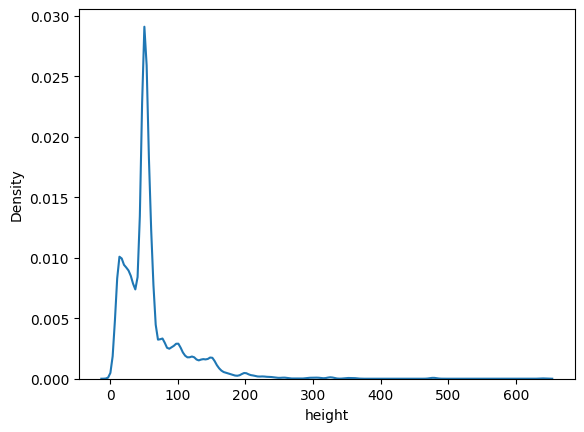

In [52]:
import seaborn as sns

# Height, width, aration are float. Let's do kernel distribution estimation.
sns.kdeplot(data=internetAd, x="height", bw_adjust=0.5)


<Axes: xlabel='width', ylabel='Density'>

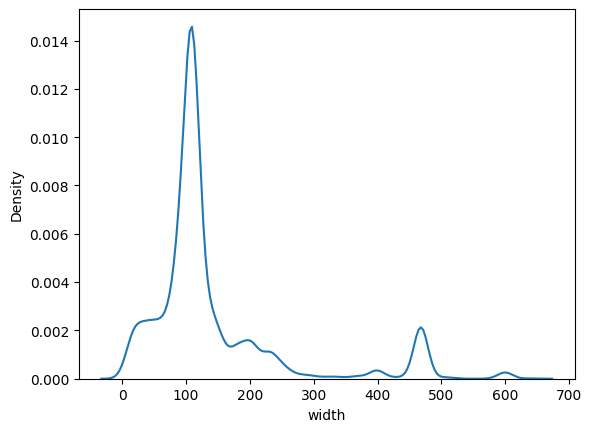

In [53]:
sns.kdeplot(data=internetAd, x="width", bw_adjust=0.5)


<Axes: xlabel='aratio', ylabel='Density'>

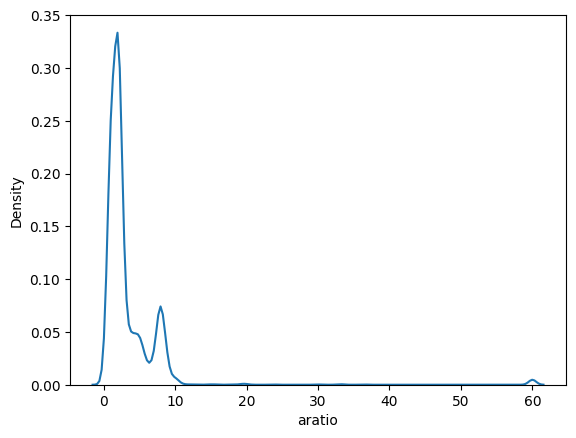

In [54]:
sns.kdeplot(data=internetAd, x="aratio", bw_adjust=0.5)

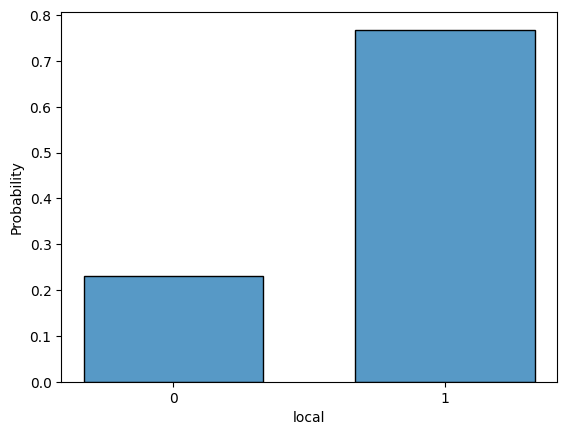

In [55]:
# Local is 0/1, let's do hostogram
ax = sns.histplot(data=internetAd, x="local", bins=2, stat="probability", discrete=True, shrink=.66)
ax.xaxis.set_ticks([0, 1])

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [56]:
from sklearn.model_selection import train_test_split

X = internetAd[["height", "width", "aratio", "local"]]
y = internetAd["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [58]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

sscaler.fit(X_train)
X_train_standard_scaled = sscaler.transform(X_train)
X_test_standard_scaled = sscaler.transform(X_test)

Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [59]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga"
)

logistic_regression.fit(X_train_minmax_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logistic_regression.predict(X_test_minmax_scaled)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[789 127]
 [ 72  95]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       916
           1       0.43      0.57      0.49       167

    accuracy                           0.82      1083
   macro avg       0.67      0.72      0.69      1083
weighted avg       0.84      0.82      0.83      1083



Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [61]:
# penalty='l1'

from sklearn.linear_model import LogisticRegression

logistic_regression_l1 = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga", penalty="l1", C=0.1
)

logistic_regression_l1.fit(X_train_minmax_scaled, y_train)
y_pred_l1 = logistic_regression_l1.predict(X_test_minmax_scaled)
print(confusion_matrix(y_test, y_pred_l1))

print(classification_report(y_test, y_pred_l1))

[[798 118]
 [ 71  96]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       916
           1       0.45      0.57      0.50       167

    accuracy                           0.83      1083
   macro avg       0.68      0.72      0.70      1083
weighted avg       0.85      0.83      0.83      1083



In [62]:
#penalty='elasticnet'
from sklearn.linear_model import LogisticRegression

logistic_regression_elasticnet = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga", penalty="elasticnet", l1_ratio=0.5
)

logistic_regression_elasticnet.fit(X_train_minmax_scaled, y_train)
y_pred_elasticnet = logistic_regression_elasticnet.predict(X_test_minmax_scaled)
print(confusion_matrix(y_test, y_pred_elasticnet))

print(classification_report(y_test, y_pred_elasticnet))

[[788 128]
 [ 75  92]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       916
           1       0.42      0.55      0.48       167

    accuracy                           0.81      1083
   macro avg       0.67      0.71      0.68      1083
weighted avg       0.84      0.81      0.82      1083



Question 5: How do the three models compare? How did you make the comparison?

The best model seems to be teh one with l1 penalty. It has the highest accuracy, precision, and recall. The l2 penalty model has the lowest accuracy, precision, and recall. The elasticnet model has all the diagnostics lowers. All in all, there wasn't much difference between the models.

Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

In [63]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga"
)

logistic_regression.fit(X_train_standard_scaled, y_train)
y_pred = logistic_regression_elasticnet.predict(X_test_standard_scaled)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[766 150]
 [ 73  94]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       916
           1       0.39      0.56      0.46       167

    accuracy                           0.79      1083
   macro avg       0.65      0.70      0.67      1083
weighted avg       0.83      0.79      0.81      1083



In [64]:
# penalty='l1'

from sklearn.linear_model import LogisticRegression

logistic_regression_l1 = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga", penalty="l1", C=0.1
)

logistic_regression_l1.fit(X_train_standard_scaled, y_train)
y_pred_l1 = logistic_regression_l1.predict(X_test_standard_scaled)
print(confusion_matrix(y_test, y_pred_l1))

print(classification_report(y_test, y_pred_l1))

[[785 131]
 [ 74  93]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       916
           1       0.42      0.56      0.48       167

    accuracy                           0.81      1083
   macro avg       0.66      0.71      0.68      1083
weighted avg       0.84      0.81      0.82      1083



In [65]:
#penalty='elasticnet'
from sklearn.linear_model import LogisticRegression

logistic_regression_elasticnet = LogisticRegression(
    max_iter=1000, class_weight="balanced", solver="saga", penalty="elasticnet", l1_ratio=0.5
)

logistic_regression_elasticnet.fit(X_train_standard_scaled, y_train)
y_pred_elasticnet = logistic_regression_elasticnet.predict(X_test_standard_scaled)
print(confusion_matrix(y_test, y_pred_elasticnet))

print(classification_report(y_test, y_pred_elasticnet))

[[789 127]
 [ 74  93]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       916
           1       0.42      0.56      0.48       167

    accuracy                           0.81      1083
   macro avg       0.67      0.71      0.68      1083
weighted avg       0.84      0.81      0.82      1083



In general the results are similiar, just a little worse accuracy, precision and recall wise. It seems that the best model is still with L1 penalty with X scaled using minx max scaler.